### Value at Risk

#### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

#### Set time from to a certain number of years: 


In [2]:
years = 15 

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365 * years)

#### The tickers:

In [3]:
tickers = ['NVDA', 'AMZN', 'GLD', 'GOOGL', 'ORCL']

#### Downloading the daily adjusted closed prices: 

Adjusted closed prices account for dividend stock splits.

In [11]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    time.sleep(2)
    data = yf.download(ticker, start = startDate, end= endDate, threads=False, progress=False, auto_adjust = False)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

                  NVDA        AMZN         GLD       GOOGL        ORCL
Date                                                                  
2011-01-03    0.362608    9.211000  138.000000   15.010458   25.740572
2011-01-04    0.361462    9.250500  134.750000   14.955070   25.626595
2011-01-05    0.389196    9.371000  134.369995   15.127690   25.268406
2011-01-06    0.443060    9.293000  133.830002   15.237720   25.374237
2011-01-07    0.455437    9.274500  133.580002   15.310741   25.260271
...                ...         ...         ...         ...         ...
2025-12-22  183.690002  228.429993  408.230011  309.779999  198.380005
2025-12-23  189.210007  232.139999  413.640015  314.350006  195.339996
2025-12-24  188.610001  232.380005  411.929993  314.089996  197.490005
2025-12-26  190.529999  232.520004  416.739990  313.510010  197.990005
2025-12-29  188.220001  232.070007  398.600006  313.559998  195.380005

[3770 rows x 5 columns]


#### Calculate the daily log returns and drop NAs:

In [13]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                NVDA      AMZN       GLD     GOOGL      ORCL
Date                                                        
2011-01-04 -0.003165  0.004279 -0.023832 -0.003697 -0.004438
2011-01-05  0.073926  0.012942 -0.002824  0.011476 -0.014076
2011-01-06  0.129622 -0.008358 -0.004027  0.007247  0.004180
2011-01-07  0.027553 -0.001993 -0.001870  0.004781 -0.004502
2011-01-10  0.037535 -0.004376  0.004034 -0.003624  0.000322
...              ...       ...       ...       ...       ...
2025-12-22  0.014808  0.004739  0.022819  0.008494  0.032845
2025-12-23  0.029608  0.016111  0.013165  0.014645 -0.015443
2025-12-24 -0.003176  0.001033 -0.004143 -0.000827  0.010946
2025-12-26  0.010128  0.000602  0.011609 -0.001848  0.002529
2025-12-29 -0.012198 -0.001937 -0.044504  0.000159 -0.013270

[3769 rows x 5 columns]


In [14]:
portfolio_value = 1000 

weights = np.array ([1/len(tickers)] * len(tickers))

print(weights)


[0.2 0.2 0.2 0.2 0.2]


#### Calculate the historical portfolio returns:

In [17]:
historical_returns = (log_returns * weights ).sum(axis=1)
print(historical_returns)

Date
2011-01-04   -0.006171
2011-01-05    0.016289
2011-01-06    0.025733
2011-01-07    0.004794
2011-01-10    0.006778
                ...   
2025-12-22    0.016741
2025-12-23    0.011617
2025-12-24    0.000767
2025-12-26    0.004604
2025-12-29   -0.014350
Length: 3769, dtype: float64


#### Find the X-day historical returns: 

In [18]:
days = 5    

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2011-01-10    0.047423
2011-01-11    0.051536
2011-01-12    0.063632
2011-01-13    0.039205
2011-01-14    0.040699
                ...   
2025-12-22    0.034695
2025-12-23    0.041712
2025-12-24    0.067348
2025-12-26    0.058118
2025-12-29    0.019379
Length: 3765, dtype: float64


#### Specify a confidence interval and calculate value at risk (VaR) using historical method: 

In [26]:
confidence_interval = 0.95

VaR = -np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value 

print(VaR)

45.727089284058785


#### Plotting the results of the historical returns: 

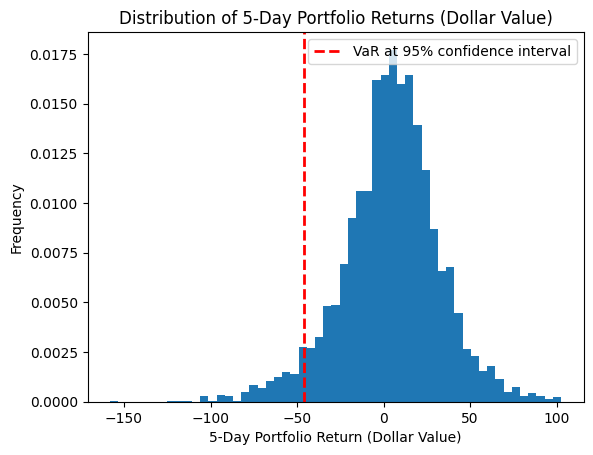

In [28]:
return_window = days 
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value 

plt.hist(range_returns_dollar.dropna(), bins=55, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of {return_window}-Day Portfolio Returns (Dollar Value)')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence interval')
plt.legend()
plt.show()